In [11]:
using PyPlot

In [58]:
function line(x1::T,y1::T,x2::T,y2::T,xeval::T)::T where T
    m = (y1-y2)/(x1-x2)
    b = y2-(m*x2)
    return m*xeval + b
end

line (generic function with 1 method)

In [33]:
function find_interval(x::Array{T,1}, xeval::T)::T where T
    for gridindex in 1:size(x,1)-1
        if (x[gridindex]<=xeval<=x[gridindex+1])
            return gridindex
        end
    end
    error("not in domain")
end

find_interval (generic function with 2 methods)

In [14]:
function interpolate(x::Array{T,1},u::Array{T,1},xeval::T)::T where T
    @assert minimum(x)<= xeval <= maximum(x)
    i = find_interval(x,xeval)
    return line(x[i],u[i],x[i+1],u[i+1],xeval)
end

interpolate (generic function with 3 methods)

In [30]:
x = [1,2,3,4,5,6,7,8,9,10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [31]:
u = sin.(x)

10-element Array{Float64,1}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

In [7]:
w = (x*2)

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [8]:
y = line(1,2,4,6,3.5)

5.333333333333333

In [9]:
i = find_interval(x,3.5)

3

In [10]:
answer = interpolate(x,w,1.5)

3.0

In [11]:
answer2 = interpolate(x,u,1.2)

0.8550362732114536

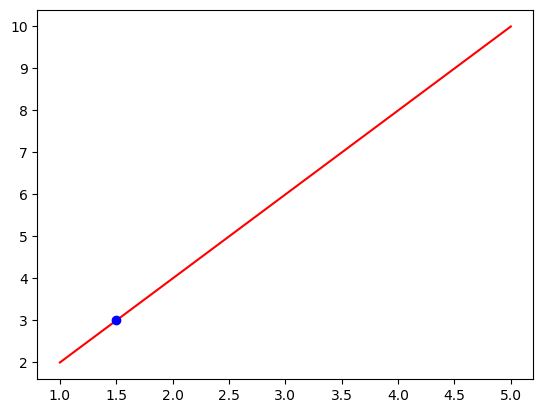

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142dae110>

In [27]:
plot(x,w,"r")
plot(1.5,answer,"b o")

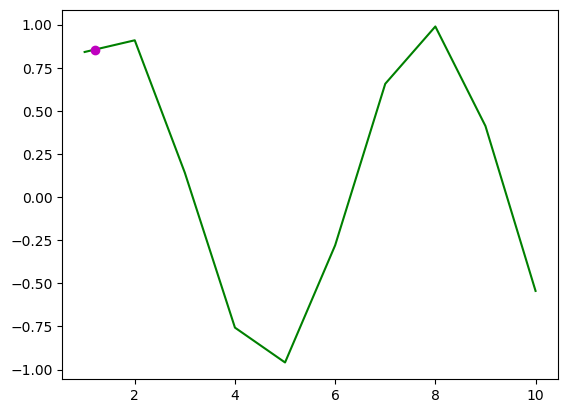

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1431da910>

In [32]:
plot(x,u,"g")
plot(1.2,answer2,"m o")